# Min-Max Normalization

In [2]:
import pandas as pd
import numpy as np


In [3]:
def normalize_with_min_max(source_data, target_data):
    # Calculate statistics of target dataset
    target_min = target_data.min()
    target_max = target_data.max()

    # Calculate statistics of source dataset
    source_min = source_data.min()
    source_max = source_data.max()

    # Compute normalization parameters
    range_diff = target_min - source_min
    range_ratio = (target_max - target_min) / (source_max - source_min)

    # Normalize the source dataset
    normalized_data = (source_data - source_min) * range_ratio + target_min
    normalized_data = normalized_data.replace([np.inf, -np.inf], 0)
    normalized_data = normalized_data.fillna(0)

    return normalized_data

In [4]:
GSE44076=pd.read_csv("Expression_GSE44072.csv", index_col=0)
GSE44076

,DSCC1,ETV4,KIAA1549,NOP56,RRS1,TEAD4,ANKRD13B
Accession,,,,,,,
GSM1077648,4.954488,3.459049,2.899443,8.372471,7.280001,5.744582,3.452822
GSM1077649,5.212193,3.189380,2.800899,8.266705,7.063761,4.882562,3.262689
GSM1077650,4.385623,3.169116,2.909771,8.108548,6.724902,4.664347,3.539274
GSM1077651,5.431559,3.645828,2.927250,9.259650,7.669818,5.825755,3.632278
GSM1077652,3.968010,3.317930,2.483557,7.964677,6.034838,4.203595,3.517858
...,...,...,...,...,...,...,...
GSM1077839,5.401100,5.922179,4.021811,9.805874,8.117232,6.770593,3.864999
GSM1077840,5.150952,6.583177,3.943380,10.285291,7.975718,7.176396,3.518676
GSM1077841,6.434477,5.274038,3.405512,9.981870,8.412287,6.937552,4.505097


In [6]:
TCGA=pd.read_csv("Expression_TCGA.csv", index_col=0).T
TCGA


,DSCC1,ETV4,KIAA1549,NOP56,RRS1,TEAD4,ANKRD13B
TCGA-AD-A5EK-01A,8.727074,12.771988,10.588522,12.890639,10.243856,10.093882,9.712558
TCGA-AF-2687-01A,9.321164,10.916901,9.850395,13.323323,9.835952,9.608935,9.739743
TCGA-AY-4071-01A,7.810028,12.348061,9.808985,11.530159,8.914660,9.742032,9.493319
TCGA-A6-2681-01A,7.991137,12.081216,9.820017,12.418364,10.947416,9.553211,8.940565
TCGA-AA-3695-01A,8.454805,10.901717,9.583429,10.950906,9.619509,9.320284,9.249120
...,...,...,...,...,...,...,...
TCGA-AA-A02Y-01A,8.305325,13.426684,10.017793,12.707412,10.362077,10.621649,7.746438
TCGA-CM-5344-01A,8.719735,11.951428,9.062946,11.902902,10.997770,9.887763,10.076568
TCGA-AA-3697-11A,8.133618,7.643052,7.436849,11.687792,9.681233,8.837730,7.208532
TCGA-G4-6299-01A,10.186692,11.666898,10.058414,11.901037,10.785560,10.084999,10.906631


In [9]:
ReNomrm_GSE44076=normalize_with_min_max(GSE44076, TCGA)
ReNomrm_GSE44076

,DSCC1,ETV4,KIAA1549,NOP56,RRS1,TEAD4,ANKRD13B
Accession,,,,,,,
GSM1077648,8.253795,7.074405,6.736188,10.305299,9.617690,9.100180,7.427601
GSM1077649,8.559238,6.660930,6.580349,10.174097,9.414730,7.968955,6.933373
GSM1077650,7.579552,6.629859,6.752520,9.977906,9.096681,7.682593,7.652323
GSM1077651,8.819240,7.360790,6.780161,11.405833,9.983568,9.206703,7.894076
GSM1077652,7.084579,6.858032,6.078501,9.799435,8.448996,7.077950,7.596655
...,...,...,...,...,...,...,...
GSM1077839,8.783139,10.851059,8.511110,12.083417,10.403505,10.446610,8.499007
GSM1077840,8.486652,11.864551,8.387080,12.678129,10.270682,10.979144,7.598781
GSM1077841,10.007941,9.857283,7.536489,12.301738,10.680440,10.665710,10.162867


# Integration of Clinical inforamtion 

In [12]:
SAnt_GSE44076=pd.read_csv("GSE44076_Ann.csv", index_col=0)
SAnt_GSE44076

,Sample_Ann
Accession,
GSM1077648,Normal
GSM1077649,Normal
GSM1077650,Normal
GSM1077651,Normal
GSM1077652,Normal
...,...
GSM1077839,Early Stage
GSM1077840,Early Stage
GSM1077841,Early Stage


In [14]:
ReNomrm_GSE44076=SAnt_GSE44076.merge(ReNomrm_GSE44076, left_index=True, right_index=True)
ReNomrm_GSE44076

,Sample_Ann,DSCC1,ETV4,KIAA1549,NOP56,RRS1,TEAD4,ANKRD13B
Accession,,,,,,,,
GSM1077648,Normal,8.253795,7.074405,6.736188,10.305299,9.617690,9.100180,7.427601
GSM1077649,Normal,8.559238,6.660930,6.580349,10.174097,9.414730,7.968955,6.933373
GSM1077650,Normal,7.579552,6.629859,6.752520,9.977906,9.096681,7.682593,7.652323
GSM1077651,Normal,8.819240,7.360790,6.780161,11.405833,9.983568,9.206703,7.894076
GSM1077652,Normal,7.084579,6.858032,6.078501,9.799435,8.448996,7.077950,7.596655
...,...,...,...,...,...,...,...,...
GSM1077839,Early Stage,8.783139,10.851059,8.511110,12.083417,10.403505,10.446610,8.499007
GSM1077840,Early Stage,8.486652,11.864551,8.387080,12.678129,10.270682,10.979144,7.598781
GSM1077841,Early Stage,10.007941,9.857283,7.536489,12.301738,10.680440,10.665710,10.162867


In [16]:
SAnt_TCGA=pd.read_csv("Normal_Early_Ann.csv", index_col=0)
SAnt_TCGA

,StageInfo
gene_name,
TCGA-AD-A5EK-01A,Early Stage
TCGA-AY-4071-01A,Early Stage
TCGA-A6-2681-01A,Early Stage
TCGA-CA-5255-01A,Early Stage
TCGA-DM-A1D4-01A,Early Stage
...,...
TCGA-QG-A5YX-01A,Early Stage
TCGA-AA-A03J-01A,Early Stage
TCGA-AA-3544-01A,Early Stage


In [17]:
TCGA=SAnt_TCGA.merge(TCGA, left_index=True,right_index=True)
TCGA

,StageInfo,DSCC1,ETV4,KIAA1549,NOP56,RRS1,TEAD4,ANKRD13B
TCGA-AD-A5EK-01A,Early Stage,8.727074,12.771988,10.588522,12.890639,10.243856,10.093882,9.712558
TCGA-AY-4071-01A,Early Stage,7.810028,12.348061,9.808985,11.530159,8.914660,9.742032,9.493319
TCGA-A6-2681-01A,Early Stage,7.991137,12.081216,9.820017,12.418364,10.947416,9.553211,8.940565
TCGA-CA-5255-01A,Early Stage,8.319969,10.800710,9.564900,12.612337,10.482063,9.811640,9.125955
TCGA-DM-A1D4-01A,Early Stage,8.787207,12.562589,9.841331,11.354847,10.247585,9.729067,8.106975
...,...,...,...,...,...,...,...,...
TCGA-QG-A5YX-01A,Early Stage,9.144346,8.361203,9.340629,12.486445,10.538750,9.430225,9.047903
TCGA-AA-A03J-01A,Early Stage,7.897702,12.936716,10.526027,11.921448,11.002073,11.500924,9.309275
TCGA-AA-3544-01A,Early Stage,10.000220,13.036229,8.676306,12.700622,11.556194,10.436375,9.211714
TCGA-AA-A02Y-01A,Early Stage,8.305325,13.426684,10.017793,12.707412,10.362077,10.621649,7.746438


#  Logistic Regression Model

    Different combination of test and validation sets

# Test Datasets

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# make the X and Y files 
X = TCGA.drop(columns=['StageInfo'])
Y = TCGA['StageInfo']
Y = Y.map({"Early Stage": 1, "Normal": 0})


results = []

for i in range(1, 101):# Generate a different random state for each iteration to create different test sets
    random_state = i
    X_train_val, X_independent, y_train_val, y_independent = train_test_split(X, Y, test_size=0.2, random_state=random_state, stratify=Y)    
    X_train, X_test, y_train, y_test = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=random_state, stratify=y_train_val)
    
    model = LogisticRegression(penalty="l2", solver='lbfgs', max_iter=200, C=0.1)
    model.fit(X_train, y_train)
    
    y_predicted = model.predict(X_test)
    y_predicted1 = model.predict(X_independent)
    
    auc_roc = roc_auc_score(y_test, y_predicted)
    conf_matrix = confusion_matrix(y_test, y_predicted)
    tn, fp, fn, tp = conf_matrix.ravel()
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted)
    recall = recall_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    mcc = matthews_corrcoef(y_test, y_predicted)

    results.append({
        'Iteration': i,
        'AUC': auc_roc,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc
    })

results_df = pd.DataFrame(results)
results_df
Test_AUC=results_df
Test_AUC

,Iteration,AUC,Sensitivity,Specificity,Accuracy,Precision,Recall,F1 Score,MCC
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,5,0.990385,0.980769,1.000000,0.983051,1.000000,0.980769,0.990291,0.926376
...,...,...,...,...,...,...,...,...,...
95,96,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
96,97,0.928571,1.000000,0.857143,0.983051,0.981132,1.000000,0.990476,0.917044
97,98,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
98,99,0.928571,1.000000,0.857143,0.983051,0.981132,1.000000,0.990476,0.917044


# Independent datasets

In [22]:

# import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix,  matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


# make the X and Y files 
X = TCGA.drop(columns=['StageInfo'])
Y = TCGA['StageInfo']
Y = Y.map({"Early Stage": 1, "Normal": 0})



results = []

for i in range(1, 101):
    # Generate a different random state for each iteration to create different test sets
    random_state = i
    X_train_val, X_independent, y_train_val, y_independent = train_test_split(X, Y, test_size=0.2, random_state=random_state, stratify=Y)    
    X_train, X_test, y_train, y_test = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=random_state, stratify=y_train_val)
    
    model = LogisticRegression(penalty="l2", solver='lbfgs', max_iter=200, C=0.1)
    model.fit(X_train, y_train)
    
    y_predicted = model.predict(X_test)
    y_predicted_1 = model.predict(X_independent)
    
    auc_roc = roc_auc_score(y_test, y_predicted)
    auc_roc_1 = roc_auc_score(y_independent, y_predicted_1)
    conf_matrix = confusion_matrix(y_test, y_predicted)
    conf_matrix_1 = confusion_matrix(y_independent, y_predicted_1)
    tn, fp, fn, tp = conf_matrix.ravel()
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(y_independent, y_predicted_1)
    precision = precision_score(y_independent, y_predicted_1)
    recall = recall_score(y_independent, y_predicted_1)
    f1 = f1_score(y_independent, y_predicted_1)
    mcc = matthews_corrcoef(y_independent, y_predicted_1)
    
    results.append({
        'Iteration': i,
        'AUC': auc_roc_1,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc
    })

results_df = pd.DataFrame(results)
results_df

TCGA_Validation=results_df
TCGA_Validation


,Iteration,AUC,Sensitivity,Specificity,Accuracy,Precision,Recall,F1 Score,MCC
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
1,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
2,3,0.944444,1.000000,1.000000,0.986486,0.984848,1.0,0.992366,0.935639
3,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
4,5,1.000000,0.980769,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...
95,96,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
96,97,1.000000,1.000000,0.857143,1.000000,1.000000,1.0,1.000000,1.000000
97,98,0.944444,1.000000,1.000000,0.986486,0.984848,1.0,0.992366,0.935639
98,99,1.000000,1.000000,0.857143,1.000000,1.000000,1.0,1.000000,1.000000


# GSE44076 (External validation)

In [24]:
# make the X and Y files 
X_GSE44076 = ReNomrm_GSE44076.drop(columns=['Sample_Ann'])
y_GSE44076 = ReNomrm_GSE44076['Sample_Ann']
y_GSE44076 = y_GSE44076.map({"Early Stage": 1, "Normal": 0})

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix,matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# make the X and Y files 
X = TCGA.drop(columns=['StageInfo'])
Y = TCGA['StageInfo']
Y = Y.map({"Early Stage": 1, "Normal": 0})



results = []

for i in range(1, 101):
    # Generate a different random state for each iteration to create different test sets
    random_state = i
    X_train_val, X_independent, y_train_val, y_independent = train_test_split(X, Y, test_size=0.2, random_state=random_state, stratify=Y)    
    X_train, X_test, y_train, y_test = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=random_state, stratify=y_train_val)
    
    model = LogisticRegression(penalty="l2", solver='lbfgs', max_iter=200, C=0.1)
    model.fit(X_train, y_train)
    
    y_predicted = model.predict(X_test)
    y_predicted_1 = model.predict(X_independent)
    
    y_predicted_2=model.predict(X_GSE44076)
    
    auc_roc = roc_auc_score(y_test, y_predicted)
    auc_roc_1 = roc_auc_score(y_independent, y_predicted_1)
    auc_roc_2 = roc_auc_score(y_GSE44076, y_predicted_2)
    
    
    
    conf_matrix_1 = confusion_matrix(y_independent, y_predicted_1)
    conf_matrix_2 = confusion_matrix(y_GSE44076, y_predicted_2)
        
    tn, fp, fn, tp = conf_matrix.ravel()
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = accuracy_score(y_GSE44076, y_predicted_2)
    precision = precision_score(y_GSE44076, y_predicted_2)
    recall = recall_score(y_GSE44076, y_predicted_2)
    f1 = f1_score(y_GSE44076, y_predicted_2)
    mcc = matthews_corrcoef(y_GSE44076, y_predicted_2)
    results.append({
        'Iteration': i,
        'AUC': auc_roc_2,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        "MCC": mcc
    })

results_df = pd.DataFrame(results)
results_df
GSE44076=results_df
GSE44076

,Iteration,AUC,Sensitivity,Specificity,Accuracy,Precision,Recall,F1 Score,MCC
0,1,0.989796,1.0,1.0,0.989796,0.989796,0.989796,0.989796,0.979592
1,2,0.989796,1.0,1.0,0.989796,0.989796,0.989796,0.989796,0.979592
2,3,0.989796,1.0,1.0,0.989796,0.989796,0.989796,0.989796,0.979592
3,4,0.989796,1.0,1.0,0.989796,0.989796,0.989796,0.989796,0.979592
4,5,0.989796,1.0,1.0,0.989796,0.989796,0.989796,0.989796,0.979592
...,...,...,...,...,...,...,...,...,...
95,96,0.989796,1.0,1.0,0.989796,0.989796,0.989796,0.989796,0.979592
96,97,0.989796,1.0,1.0,0.989796,0.989796,0.989796,0.989796,0.979592
97,98,0.989796,1.0,1.0,0.989796,0.989796,0.989796,0.989796,0.979592
98,99,0.989796,1.0,1.0,0.989796,0.989796,0.989796,0.989796,0.979592


# Combined Test, Validation and External Datasests with selected seed

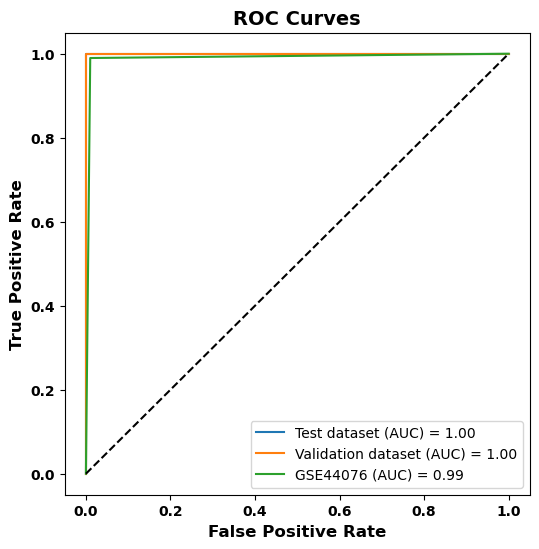

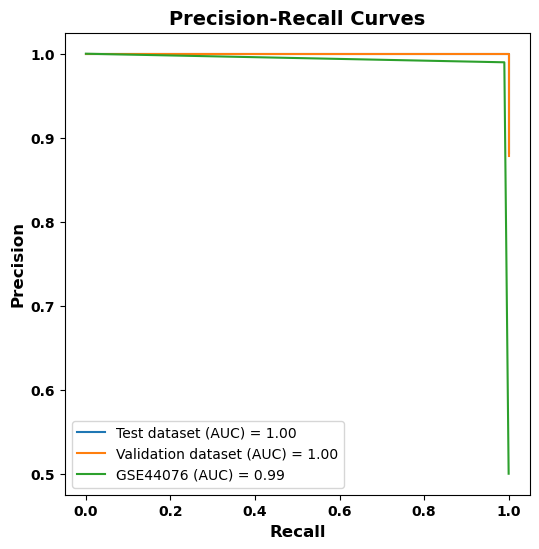

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


X = TCGA.drop(columns=['StageInfo'])
Y = TCGA['StageInfo']
Y = Y.map({"Early Stage": 1, "Normal": 0})
# Split data
random_state = 1
X_train_val, X_independent, y_train_val, y_independent = train_test_split(X, Y, test_size=0.2, random_state=random_state, stratify=Y)    
X_train, X_test, y_train, y_test = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=random_state, stratify=y_train_val)

# Train the model
model = LogisticRegression(penalty="l2", solver='lbfgs', max_iter=200, C=0.1)
model.fit(X_train, y_train)

# Make predictions
y_pred_test = model.predict(X_test)
y_pred_independent = model.predict(X_independent)

# Load external datasets
X_GSE44076 = ReNomrm_GSE44076.drop(columns=['Sample_Ann'])
y_GSE44076 = ReNomrm_GSE44076['Sample_Ann']
y_GSE44076 = y_GSE44076.map({"Early Stage": 1, "Normal": 0})
y_pred_GSE44076 = model.predict(X_GSE44076)



# Calculate ROC curves

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
fpr_independent, tpr_independent, _ = roc_curve(y_independent, y_pred_independent)
fpr_GSE44076, tpr_GSE44076, _ = roc_curve(y_GSE44076, y_pred_GSE44076)


# Plot ROC curves
plt.figure(figsize=(6,6))
plt.plot(fpr_test, tpr_test, label=f'Test dataset (AUC) = {auc(fpr_test, tpr_test):.2f}')
plt.plot(fpr_independent, tpr_independent, label=f'Validation dataset (AUC) = {auc(fpr_independent, tpr_independent):.2f}')
plt.plot(fpr_GSE44076, tpr_GSE44076, label=f'GSE44076 (AUC) = {auc(fpr_GSE44076, tpr_GSE44076):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=12, weight='bold')
plt.ylabel('True Positive Rate', fontsize=12, weight='bold')
plt.title('ROC Curves', fontsize=14, weight='bold')
plt.legend(loc='lower right')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.show()



# Precision-Recall curves

precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_test)
precision_independent, recall_independent, _ = precision_recall_curve(y_independent, y_pred_independent)
precision_GSE44076, recall_GSE44076, _ = precision_recall_curve(y_GSE44076, y_pred_GSE44076)

# Plot Precision-Recall curves
plt.figure(figsize=(6, 6))
plt.plot(recall_test, precision_test, label=f'Test dataset (AUC) = {auc(recall_test, precision_test):.2f}')
plt.plot(recall_independent, precision_independent, label=f'Validation dataset (AUC) = {auc(recall_independent, precision_independent):.2f}')
plt.plot(recall_GSE44076, precision_GSE44076, label=f'GSE44076 (AUC) = {auc(recall_GSE44076, precision_GSE44076):.2f}')
plt.xlabel('Recall', fontsize=12, weight='bold')
plt.ylabel('Precision', fontsize=12, weight='bold')
plt.title('Precision-Recall Curves', fontsize=14, weight='bold')
plt.legend(loc='lower left')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.show()


# Random Forest

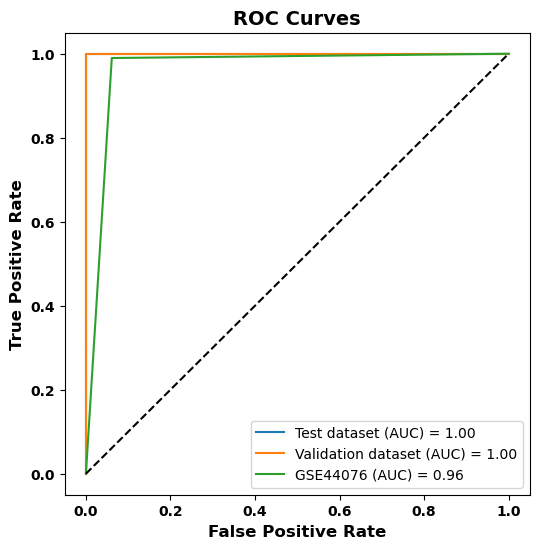

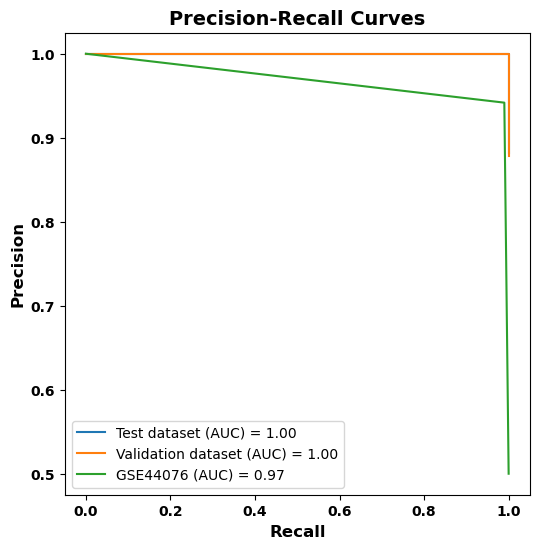

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


X = TCGA.drop(columns=['StageInfo'])
Y = TCGA['StageInfo']
Y = Y.map({"Early Stage": 1, "Normal": 0})
# Split data
random_state = 1
X_train_val, X_independent, y_train_val, y_independent = train_test_split(X, Y, test_size=0.2, random_state=random_state, stratify=Y)    
X_train, X_test, y_train, y_test = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=random_state, stratify=y_train_val)

# Train the model
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

# Make predictions
y_pred_test = model.predict(X_test)
y_pred_independent = model.predict(X_independent)

# Load external datasets
X_GSE44076 = ReNomrm_GSE44076.drop(columns=['Sample_Ann'])
y_GSE44076 = ReNomrm_GSE44076['Sample_Ann']
y_GSE44076 = y_GSE44076.map({"Early Stage": 1, "Normal": 0})
y_pred_GSE44076 = model.predict(X_GSE44076)



# Calculate ROC curves

fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test)
fpr_independent, tpr_independent, _ = roc_curve(y_independent, y_pred_independent)
fpr_GSE44076, tpr_GSE44076, _ = roc_curve(y_GSE44076, y_pred_GSE44076)


# Plot ROC curves
plt.figure(figsize=(6,6))
plt.plot(fpr_test, tpr_test, label=f'Test dataset (AUC) = {auc(fpr_test, tpr_test):.2f}')
plt.plot(fpr_independent, tpr_independent, label=f'Validation dataset (AUC) = {auc(fpr_independent, tpr_independent):.2f}')
plt.plot(fpr_GSE44076, tpr_GSE44076, label=f'GSE44076 (AUC) = {auc(fpr_GSE44076, tpr_GSE44076):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=12, weight='bold')
plt.ylabel('True Positive Rate', fontsize=12, weight='bold')
plt.title('ROC Curves', fontsize=14, weight='bold')
plt.legend(loc='lower right')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.show()



# Precision-Recall curves

precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_test)
precision_independent, recall_independent, _ = precision_recall_curve(y_independent, y_pred_independent)
precision_GSE44076, recall_GSE44076, _ = precision_recall_curve(y_GSE44076, y_pred_GSE44076)

# Plot Precision-Recall curves
plt.figure(figsize=(6, 6))
plt.plot(recall_test, precision_test, label=f'Test dataset (AUC) = {auc(recall_test, precision_test):.2f}')
plt.plot(recall_independent, precision_independent, label=f'Validation dataset (AUC) = {auc(recall_independent, precision_independent):.2f}')
plt.plot(recall_GSE44076, precision_GSE44076, label=f'GSE44076 (AUC) = {auc(recall_GSE44076, precision_GSE44076):.2f}')
plt.xlabel('Recall', fontsize=12, weight='bold')
plt.ylabel('Precision', fontsize=12, weight='bold')
plt.title('Precision-Recall Curves', fontsize=14, weight='bold')
plt.legend(loc='lower left')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.show()
